In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from modelDSUNET import *

2025-02-11 23:53:53.426128: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 23:53:53.512815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739298233.553993   22021 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739298233.565804   22021 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 23:53:53.649518: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

shape of rgb stream=>(None, 128, 128, 64)
shape of rgb stream=>(None, 64, 64, 64)
shape of rgb stream=>(None, 32, 32, 128)
shape of rgb stream=>(None, 16, 16, 256)
shape of rgb stream=>(None, 8, 8, 512)
shape of noise stream=>(None, 128, 128, 64)
shape of noise stream=>(None, 64, 64, 64)
shape of noise stream=>(None, 32, 32, 128)
shape of noise stream=>(None, 16, 16, 256)
shape of noise stream=>(None, 8, 8, 512)
Fusion at layer 0: (None, 128, 128, 64)
Fusion at layer 1: (None, 64, 64, 64)
Fusion at layer 2: (None, 32, 32, 128)
Fusion at layer 3: (None, 16, 16, 256)
Fusion at layer 4: (None, 8, 8, 512)
shape of fused=>(None, 128, 128, 64)
shape of fused=>(None, 64, 64, 64)
shape of fused=>(None, 32, 32, 128)
shape of fused=>(None, 16, 16, 256)
shape of fused=>(None, 8, 8, 512)
(None, 16, 16, 256)
(None, 32, 32, 512)
(None, 64, 64, 256)
(None, 128, 128, 64)
(None, 256, 256, 32)
final output of the model=>(None, 256, 256, 1)


Model: "DS_UNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ noise_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rgb_input           │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ srm_filter_layer    │ (None, 256, 256,  │          0 │ noise_input[0][0] │
│ (SRMFilterLayer)    │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rgb_encoder         │ [(None, 128, 128, │  4,847,168 │ rgb_input[0][0]   │
│ (Functional)        │ 64), (None, 64,   │            │                   │
│                     │ 64, 64), (None,   │            │                   │
│                     │ 32, 32, 128),     │            │                   │
│                     │ (None, 16, 16,    │            │                   │
│                     │ 256), (None, 8,   │            │                   │
│                     │ 8, 512)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noise_encoder       │ [(None, 128, 128, │  4,847,168 │ srm_filter_layer… │
│ (Functional)        │ 64), (None, 64,   │            │                   │
│                     │ 64, 64), (None,   │            │                   │
│                     │ 32, 32, 128),     │            │                   │
│                     │ (None, 16, 16,    │            │                   │
│                     │ 256), (None, 8,   │            │                   │
│                     │ 8, 512)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion4 (Add)       │ (None, 8, 8, 512) │          0 │ rgb_encoder[0][4… │
│                     │                   │            │ noise_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │    524,544 │ fusion4[0][0]     │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion3 (Add)       │ (None, 16, 16,    │          0 │ rgb_encoder[0][3… │
│                     │ 256)              │            │ noise_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 512)              │            │ fusion3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │  1,179,904 │ concatenate[0][0] │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ in_place_abn        │ (None, 16, 16,    │      1,024 │ conv2d_1[0][0]    │
│ (InPlaceABN)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │    590,080 │ in_place_abn[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ in_place_abn_1      │ (None, 16, 16,    │      1,024 │ conv2d_2[0][0]    │
│ (InPlaceABN)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 18,631,629 (71.07 MB)

 Trainable params: 13,777,741 (52.56 MB)

 Non-trainable params: 4,853,888 (18.52 MB)

done hai 


In [3]:

# Set Paths
train_path = r"/home/manik/Documents/datasets/casia_dataset/train"
val_path = r"/home/manik/Documents/datasets/casia_dataset/val"

# Set Parameters
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 8


In [4]:

def get_image_mask_dataframe(image_dir, mask_dir):
    image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))])
    mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))])
    
    return pd.DataFrame({'image': image_paths, 'mask': mask_paths})


train_df = get_image_mask_dataframe(os.path.join(train_path, "image"), os.path.join(train_path, "masks"))
val_df = get_image_mask_dataframe(os.path.join(val_path, "image"), os.path.join(val_path, "masks"))


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


def create_generator(datagen, df, x_col, color_mode="rgb"):
    return datagen.flow_from_dataframe(
        dataframe=df,
        x_col=x_col,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode=None,  
        color_mode=color_mode,
        seed=42
    )



In [5]:
# Create Separate Generators for Images & Masks
train_img_gen = create_generator(train_datagen, train_df, x_col="image", color_mode="rgb")
train_mask_gen = create_generator(train_datagen, train_df, x_col="mask", color_mode="grayscale")

val_img_gen = create_generator(val_test_datagen, val_df, x_col="image", color_mode="rgb")
val_mask_gen = create_generator(val_test_datagen, val_df, x_col="mask", color_mode="grayscale")

# Zip Image and Mask Generators
train_ds = zip(train_img_gen, train_mask_gen)
val_ds = zip(val_img_gen, val_mask_gen)

Found 1000000 validated image filenames.
Found 1000000 validated image filenames.
Found 5000 validated image filenames.
Found 5000 validated image filenames.


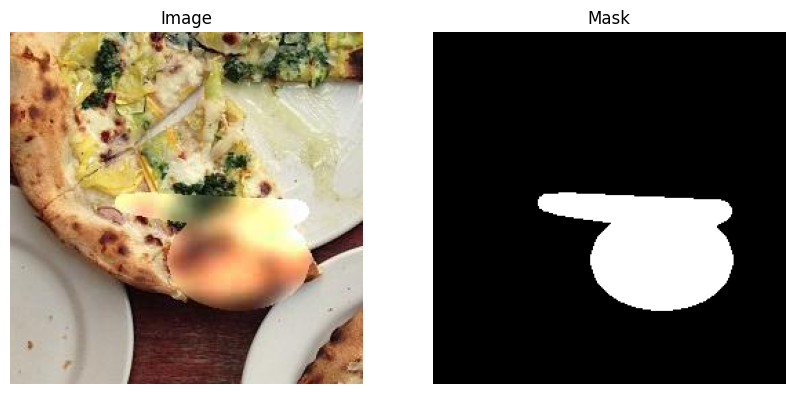

In [6]:

def display_random_sample(dataset, num_samples=1):
    """Randomly selects and displays an image and its corresponding mask."""
    batch_images, batch_masks = next(dataset)  
    for _ in range(num_samples):
        idx = random.randint(0, len(batch_images) - 1) 

        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        ax[0].imshow(batch_images[idx])  # Display Image
        ax[0].set_title("Image")
        ax[0].axis("off")

        ax[1].imshow(batch_masks[idx].squeeze(), cmap="gray")  # Display Mask
        ax[1].set_title("Mask")
        ax[1].axis("off")

        plt.show()

# Example Usage
display_random_sample(val_ds)


In [7]:
batch_images, batch_masks = next(val_ds)
batch_images.shape


(8, 256, 256, 3)